# Regresyon
1. Lineer Regresyon
2. Polinom Regresyon
3. Ridge, Lasso Regresyonlari
4. SVR (Support Vector Regression)
5. Karar Agaci Regresyonu

### Lineer Regresyon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image

In [2]:
dataset = pd.read_csv('Data/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.shape

(30, 2)

In [4]:
X = dataset[['YearsExperience']] # Bagimsiz degisken
y = dataset[['Salary']] # Bagimli degisken

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24, 1), (6, 1))

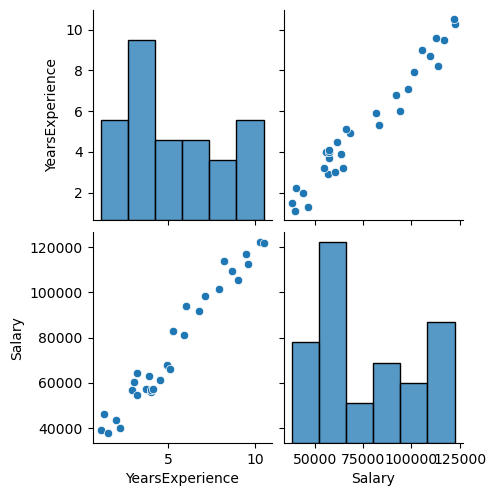

In [7]:
sns.pairplot(dataset)
# Verinin dagilimina bakarak lineer regresyon uygulanabilir diyoruz

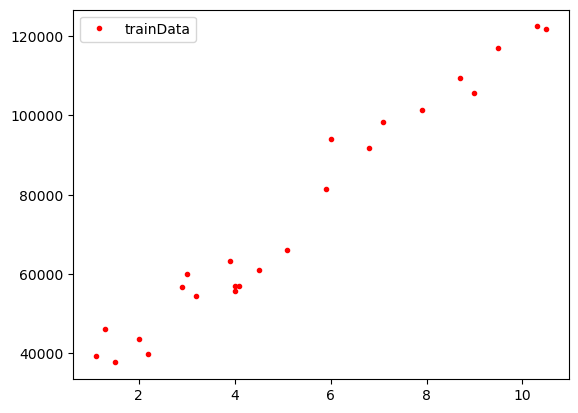

In [8]:
plt.plot(X_train, y_train, 'r.', label='trainData')
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test).round(1)

In [11]:
y_pred

array([[115790.2],
       [ 71498.3],
       [102596.9],
       [ 75267.8],
       [ 55477.8],
       [ 60189.7]])

In [12]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['original salary', 'predicted salary'])
hesaplama

,original salary,predicted salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


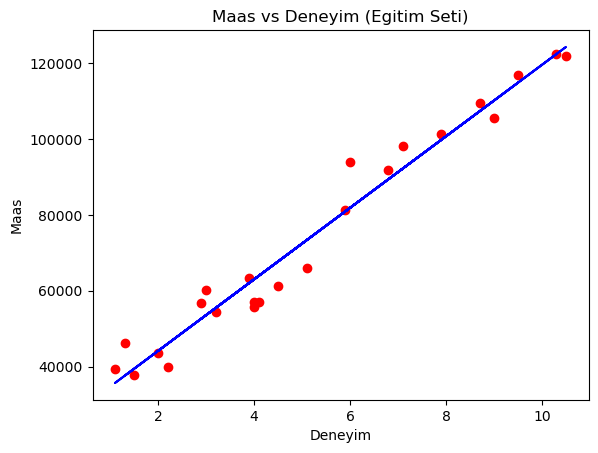

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Maas vs Deneyim (Egitim Seti)')
plt.xlabel('Deneyim')
plt.ylabel('Maas')
plt.show()

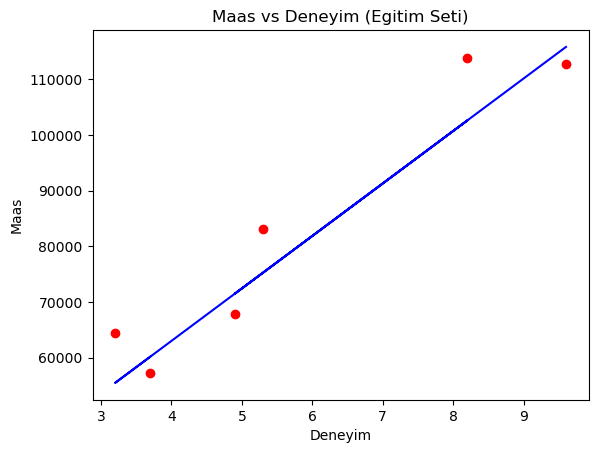

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Maas vs Deneyim (Egitim Seti)')
plt.xlabel('Deneyim')
plt.ylabel('Maas')
plt.show()

### Polinom Lineer Regresyon
*  Bu tür doğrusal regresyon, verilere düz bir çizgi yerine bir eğri uydurmayı içerir ve basit bir doğrusal ilişkiden daha karmaşık olan ilişkileri modellemek için kullanılır.

- y = a + b*x + c*x^2 + ... + n*x^n + ...

In [15]:
dataset = pd.read_csv('Data/Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [16]:
dataset = dataset.drop(['Position'], axis=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [17]:
%matplotlib inline

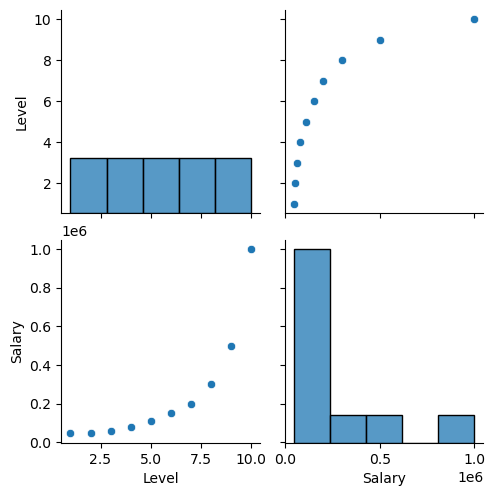

In [18]:
sns.pairplot(dataset)
# Gorundugu uzre polinom goruntusu var lineer degildir

In [19]:
# Bagimli, Bagimsiz degisken ayirma. X = Bagimsiz, y = Bagimli 
X = dataset.drop(['Salary'], axis=True)
y = dataset['Salary']

In [20]:
# egitim ve test seti ayirma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [21]:
# Lineer regresyon ile fit edersek acaba ne sonuc aliriz deneme
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
print('Training Accuracy :', lin_reg.score(X_train, y_train))
print('Testing Accuracy :', lin_reg.score(X_test, y_test))

Training Accuracy : 0.6366049276570868
Testing Accuracy : 0.8451346684575975


In [23]:
# Polinom Regression ile fit edelim ve accuracy degerlerine bakalim
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
X_poly_test = poly_reg.transform(X_test)

In [24]:
print('Training Accuracy :', lin_reg_2.score(X_poly, y_train))
print('Testing Accuracy :', lin_reg_2.score(X_poly_test, y_test))

Training Accuracy : 0.9995857211026753
Testing Accuracy : 0.9714666803840316


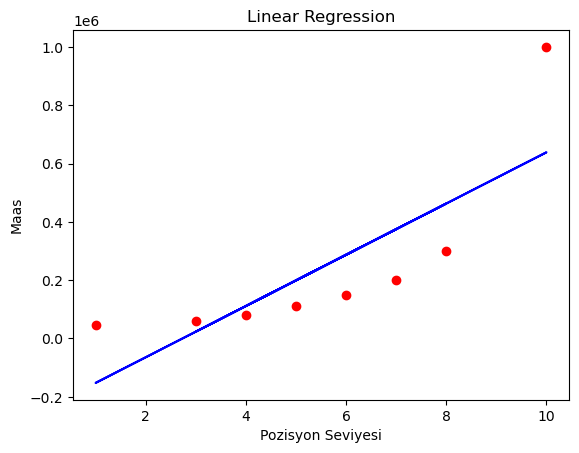

In [25]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color='blue')
plt.title('Linear Regression')
plt.xlabel('Pozisyon Seviyesi')
plt.ylabel('Maas')
plt.show()

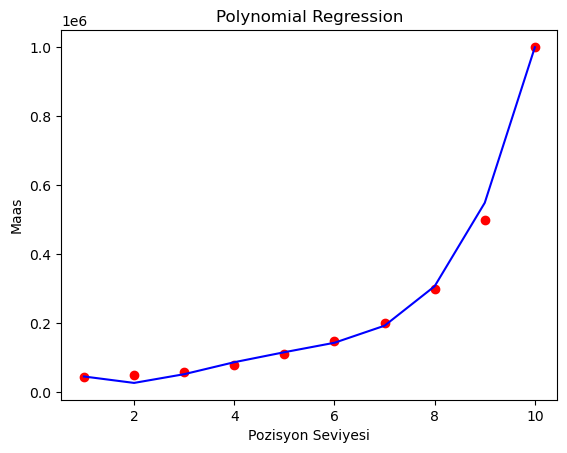

In [26]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Pozisyon Seviyesi')
plt.ylabel('Maas')
plt.show()

### Multiple Linear Regression
* Çoklu regresyon, iki bağımsız değişken ve bir bağımlı değişken olduğunda kullanılır. Bağımsız değişkenlerin bağımlı değişken üzerinde nasıl bir etkiye sahip olduğunu bu sayede belirleyebiliriz.

* y = b0 + b1*x1 + b2*x2 + ... + bn*xn + ...

In [27]:
dataset = pd.read_csv('Data/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
dataset.shape

(50, 5)

In [29]:
dataset = dataset.drop('State', axis=True)

In [30]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

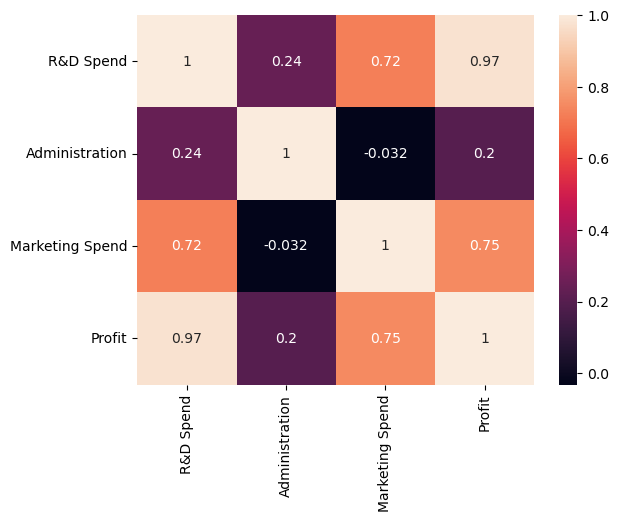

In [31]:
corr = dataset.corr()
sns.heatmap(corr, annot=True)

In [32]:
X = dataset.drop('Profit', axis=True)
y= dataset['Profit']

In [33]:
#Normalizasyon 0 ile 1 arasina verileri gosterir
#Standartizasyon normal distirubition (Can Egrisi) a gore sadelestirir.

In [34]:
#Standartizasyon
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
#ortalamasi 0 cikar cunku normal dustribution
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
#Random State genelde 0,1,42,56 degerlerini alir

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = regressor.predict(X_test).round(1)

In [39]:
hesaplama2 = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Profit', 'Predicted Profit'])
hesaplama2.head()

,Original Profit,Predicted Profit
0,105008.31,114729.0
1,96479.51,90569.0
2,78239.91,75952.3
3,81229.06,70179.8
4,191050.39,179539.2


In [40]:
print('Training Accuracy :',regressor.score(X_train, y_train))
print('Testing Accuracy :',regressor.score(X_test, y_test))

Training Accuracy : 0.94240260741009
Testing Accuracy : 0.9650940934427323


In [41]:
regressor.intercept_ #b0 

111863.56862091689

In [42]:
regressor.coef_ #b1, b2, b3 Katsayilar

array([35180.46140271,  -243.29197888,  3553.01576976])

In [43]:
#Matematigi
# 35180*x1 + -243*x2 + 3553*x3 + 111863

---

## Gradient Descent Optimization (Asamali Azaltma, Gradyan Inis)

* Hata fonksiyonunu (Cost) minimize etmek icin, azaltmak icin kullandigimiz optimizasyon iyilestirme algoritmalarindan bir tanesi.

* Ogrenme parametrelerinin guncellenmesi icin kullanilir.

* Gradient 0 a ulasinca algoritma tamamlanir.

### Turleri:
1. Batch GD :Egitim verilerimiz fazla ise hesaplama uzun suruyor. Eger fazlaysa Batch kullanmamaliyiz bunun yerine diger algoritmalari kullanmaliyiz.
2. Stochastic GD :Her iterasyonda butun ornekleri degilde sadece 1 egitim ornegini process ediyoruz. Tek bir ornek islendigi zaman sadece ilgili parametreler guncellenmis oluyor. 
3. Mini Batch GD: Hem Batch den hem Stochastic den daha hizli calisir. Her seferinde bizim sectigimiz kadar ornek proccess ediliyor.

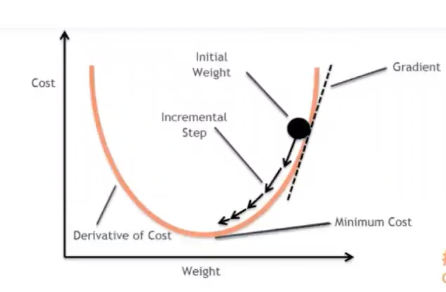

In [47]:
display(Image(filename='images/gradientD.png'))

In [44]:
plt.rcParams['figure.figsize'] = (10,5)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [45]:
cols = ['a', 'b']
data = pd.read_csv('Data/data.csv', header = None, names= cols)
data.head()

,a,b
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [48]:
x = data.drop('b', axis=1)
y = data['b']

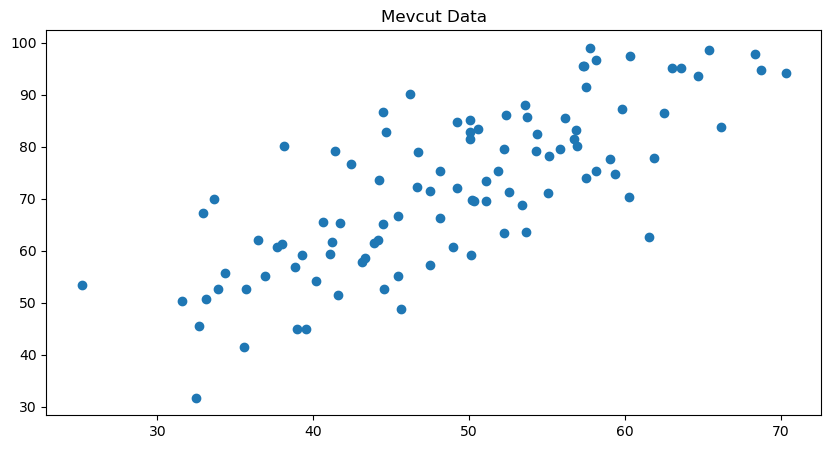

In [49]:
plt.scatter(x,y)
plt.title('Mevcut Data')
plt.show()

In [50]:
## Optimizasyonsuz

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [52]:
y_pred_lr = lr.predict(x)

In [53]:
print('Intercept :', lr.intercept_)
print('Coefficient :', lr.coef_[0])

Intercept : 13.642154681481571
Coefficient : 1.1927057602312432


In [55]:
## Simdi Gradient Descentli Optimizasyonlu

In [56]:
X = data.iloc[:,0]
Y = data.iloc[:,1]

In [59]:
m = 0 #Intercept
c = 0 #Coefficient

L = 0.0001 #Learning rate
epochs = 1000

n = float(len(X)) #X in eleman sayisi

for i in range(epochs):
    Y_pred = m*X+c
    D_m = (-2/n)* sum(X*(Y-Y_pred))
    D_c = (-2/n) * sum(Y-Y_pred)
    c = c-L*D_c
    m = m-L*D_m
print('Intercept: ',m)
print('Coefficient: ',c)

Intercept:  1.4582620978635645
Coefficient:  0.13106568099591231


In [60]:
# Gorundugu uzre optimizasyonlu hali intercepti ve coef'i bi hayli dusurdu

---------------Without GD -----------------


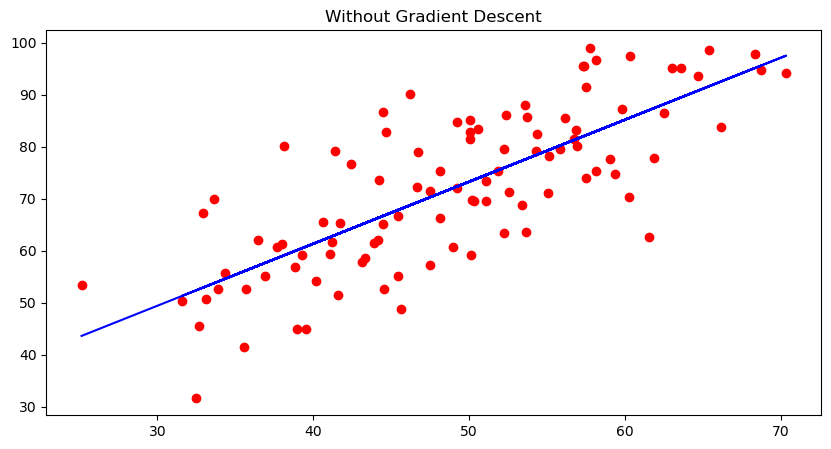

In [62]:
print('---------------Without GD -----------------')
plt.scatter(x,y,color='red')
plt.plot(x, lr.predict(x), color = 'blue')
plt.title('Without Gradient Descent')
plt.show()

---------------With GD -----------------


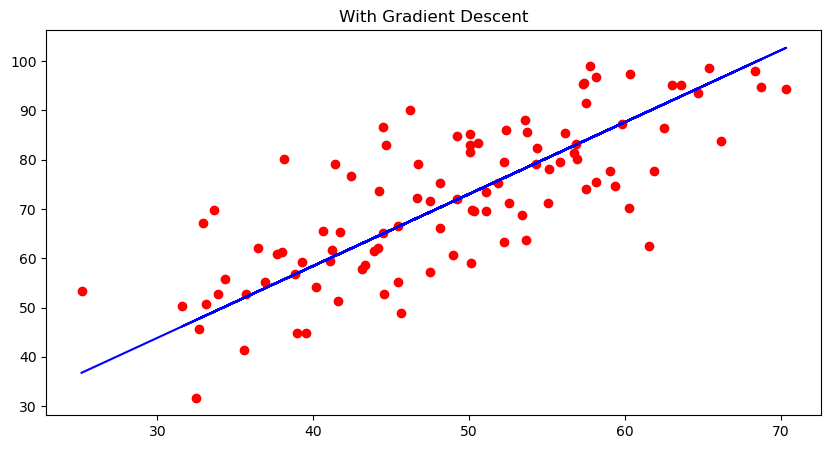

In [63]:
print('---------------With GD -----------------')
plt.scatter(X,Y,color='red')
plt.plot(X, Y_pred, color = 'blue')
plt.title('With Gradient Descent')
plt.show()